# Titanic Passengers Analysis

## Introduction

In this project, I analysed demographic dataset of titanic passengers obtained from Kaggle website.

The sinking of the Titanic is great sorrow in modern history but also famous story because of the movie filmed by James Cameron. In the movie, Titanic, crew shouted "embark first young and women to save boats". I am curious about this is really true, and want to see whether people in the Cruise were willing to give their way to other people on the verge of death; though this cannot strongly conclude that people will do the same as those who are on the Titanic. 

<!--
those who are young and women had a higher priority to embark the safe boats than those who are men and old.

Then, I will investigate factors for which one has the most influence on the passengers' servive in Titanic disaster.

To answer the first question; Did younger or women survive more than men or older, I just briefly compared survival rate between them.

I will use hypothesis test (t-test) to compare factors in order to identify which one has the most possiblity to survive in a sinking cruise for further predctions, dealing with titanic data set as a sample data.
-->

To answer the question; did younger or women survive more than men or older, I just briefly compared survival rates between them.

For the task to answer the question, the analysis will follow the flow as below recursively,

1. __*Data Wrangling*__ to investigate problems in the data set
2. __*Data Exploration*__ to detect further problems and find patterns
3. __*Drawing Conclusions*__ to conclude the factor for passengers' servive

---

## 1. Did female survive more than male?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The first step is to look at the structure of the dataset by printing out the first few rows of the data set, in order to see whether there is any problem we have to perform data wrangling.

In [2]:
file_name = "titanic-data.csv"
titanic_df = pd.read_csv(file_name)

In [3]:
print(len(titanic_df))
titanic_df.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I just want to see the number of survivals in terms of their age and sex. So, I grouped them into two; male and female. 

In [4]:
grouped_by_sex = titanic_df.groupby("Sex")

total_by_sex = grouped_by_sex.count()["PassengerId"]
total_by_sex

Sex
female    314
male      577
Name: PassengerId, dtype: int64

577 men and 314 women embarked in Titanic, and the sum of these two numbers is the same as the total number of passengers. So, there are no missing data (passenger's unidentified sex).

However, there are some discrepancy between the total number of women and their count for 'Age', 'Cabin' and 'Embarked', as well as between the total number of men in the cruise and their count of 'Age' and 'Embarked'. For example, 314 female passengers were embarked to Titanic, but only 261 female passengers' age is known, and 97 female passenger's Cabin information are identified. This time I just want to know the number of survival in terms of passengers' sex, I will neglect these, but these discrepancies will be dealt with later to find the factor which has an influence on survival rate.

If I sum of elements in Survived column, this will result in the number of survivals because 1 implied survived and 0 means couldn't.

In [5]:
survived_by_sex = grouped_by_sex["Survived"].sum()
survived_by_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

233 women out of 314 were saved and 109 men out of 577 were survived from the Titanic accident. It is better to plot this survival numbers for both sex to help recognise those differences in an intuitive sense.

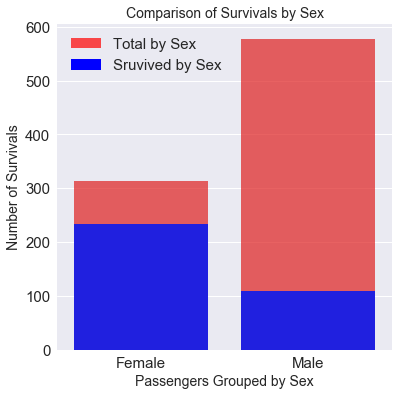

In [6]:
# create a new dataframe
sex_df = pd.concat([total_by_sex, survived_by_sex], axis=1)

plt.figure(figsize=(6, 6))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

top_plot = sns.barplot(x = ['Female', 'Male'], y = sex_df['PassengerId'], color = "red", alpha = 0.7)
bottom_plot = sns.barplot(x = ['Female', 'Male'], y = sex_df['Survived'], color = "blue", alpha = 1)

plt.ylabel('Number of Survivals', size = '14')
plt.xlabel('Passengers Grouped by Sex', size = '14')
plt.title('Comparison of Survivals by Sex', size = '14')

topbar = plt.Rectangle((0,0),1,1,fc="red", alpha = 0.7)
bottombar = plt.Rectangle((0,0),1,1,fc='blue')
legend = plt.legend([topbar, bottombar], ['Total by Sex', 'Sruvived by Sex'], loc=2, ncol = 1, prop={'size':15})

As seen in the above figure, although fewer female passengers were on the cruise than men, a larger number of female passengers were survived than male passengers (more than twice the number of female passengers than male passengers survived). So, the story of the movie says true.

---
## 2. Did young people survived more than older people?

Next, I want to know younger people (under 18) were survived more than older people, and then the number of their survivals in terms of Sex. Before diving into the investigation, I want to find all missing data in the 'Age' column (passengers' unidentified age). So, I count the data frame and it shows as below.

In [7]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

The age information of 177 passengers was unidentified, so I ruled out those missing data.

In [8]:
survived_by_age = titanic_df[titanic_df['Age'].notnull()]
survived_by_age['Age'].count()

714

In [9]:
survived_by_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


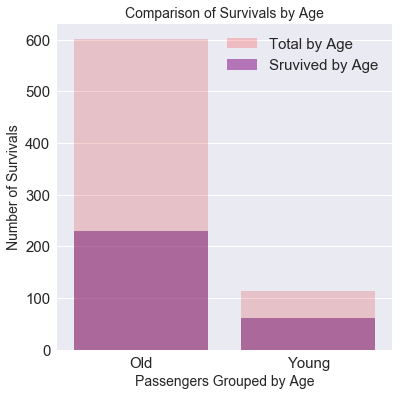

In [10]:
## Add new label 'Young or Older' that check whether passengers are under 18 or above
def Young_Older(data):
    data['Young or Older'] = 'Young' if data['Age'] < 18 else 'Old'
    return data

survived_by_age = survived_by_age.apply(Young_Older, axis = 1)
#survived_by_age.head()

## Make a new data frame sorted by Age
age_grouped = survived_by_age.groupby('Young or Older')
age_total = age_grouped.count()['PassengerId'] # total number of passengers in terms of their age
age_survived = age_grouped.sum()['Survived'] # number of survived passengers in terms of their age
age_df = pd.concat([age_survived, age_total], axis = 1)
# age_df

## Draw figures
plt.figure(figsize=(6, 6))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

top_plot = sns.barplot(x = ['Old', 'Young'], y = age_df['PassengerId'], color = "red", alpha = 0.2)
bottom_plot = sns.barplot(x = ['Old', 'Young'], y = age_df['Survived'], color = 'purple', alpha = 0.5)

plt.ylabel('Number of Survivals', size = '14')
plt.xlabel('Passengers Grouped by Age', size = '14')
plt.title('Comparison of Survivals by Age', size = '14')

topbar = plt.Rectangle((0,0),1,1,fc="red", alpha = 0.2)
bottombar = plt.Rectangle((0,0),1,1,fc='purple', alpha = 0.5)
legend = plt.legend([topbar, bottombar], ['Total by Age', 'Sruvived by Age'], loc=0, ncol = 1, prop={'size':15})

Only compare to the number of survivals in terms of their age, older people were saved of their life more than young people, but if I see the rate of them, over half of young people were survived, while people over 18 had the survival rate lower than 40%.

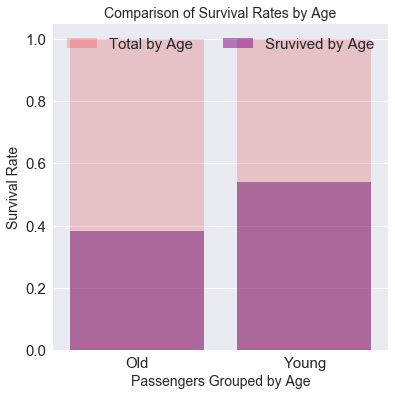

In [11]:
plt.figure(figsize=(6, 6))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

top_plot = sns.barplot(x = ['Old', 'Young'], y = age_df['PassengerId']/age_df['PassengerId'], color = "red", alpha = 0.2)
bottom_plot = sns.barplot(x = ['Old', 'Young'], y = age_df['Survived']/age_df['PassengerId'], color = 'purple', alpha = 0.5)

plt.ylabel('Survival Rate', size = '14')
plt.xlabel('Passengers Grouped by Age', size = '14')
plt.title('Comparison of Survival Rates by Age', size = '14')

topbar = plt.Rectangle((0,0),1,1,fc="red", alpha = 0.2)
bottombar = plt.Rectangle((0,0),1,1,fc='purple', alpha = 0.5)
legend = plt.legend([topbar, bottombar], ['Total by Age', 'Sruvived by Age'], loc=0, ncol = 2, prop={'size':15})

___
## Did girls survive more than gentlemen according to the shout in that movie?

Finally, I want to conclude the question that did younger and women survives more than men and older. If so, girls should have a higher survival rate than others. For that, I seperated data set including a new column 'Young or Older' into two groups in terms of their sex.

In [12]:
female_df = survived_by_age[survived_by_age['Sex'] == 'female']
female_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Young or Older
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Old
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Old
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Old


In [13]:
male_df = survived_by_age[survived_by_age['Sex'] == 'male']
male_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Young or Older
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Old
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Old
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Old


At first, I got the percentage for the total number of those groups categorized by sex and age.

In [14]:
total_num = male_df['PassengerId'].count() + female_df['PassengerId'].count()
total_rate = pd.DataFrame({'Gentelmen': male_df[male_df['Young or Older'] == 'Old']['PassengerId'].count() / total_num,
                           'Boy': male_df[male_df['Young or Older'] == 'Young']['PassengerId'].count() / total_num,
                           'Girl': female_df[female_df['Young or Older'] == 'Young']['PassengerId'].count() / total_num,
                           'Lady': female_df[female_df['Young or Older'] == 'Old']['PassengerId'].count() / total_num},
                         index = ['Rate'])

total_rate

,Boy,Gentelmen,Girl,Lady
Rate,0.081232,0.553221,0.077031,0.288515


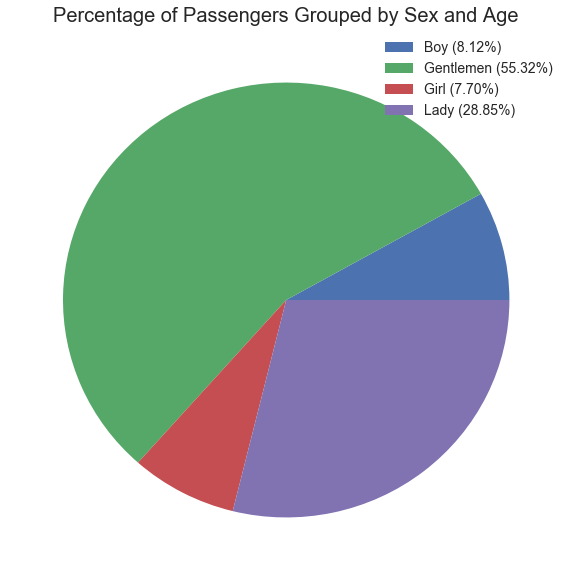

In [15]:
plt.figure(figsize=(10, 10))
plt.pie(total_rate.loc['Rate'])
plt.legend(['Boy (8.12%)', 'Gentlemen (55.32%)', 'Girl (7.70%)', 'Lady (28.85%)'], loc="best", prop={'size':14})
plt.title('Percentage of Passengers Grouped by Sex and Age', size='20')

On Titanic, over half of passengers are adult male (55.32%), followed by adult female (28.85%). The passengers who are under 18 are about 16%, boy is 8.12% and girl is 7.70% respectively.

Then, I calculated the survival rate for each group by categorizing their age.

In [16]:
survival_rate_boy = male_df[male_df['Young or Older'] == 'Young']['Survived'].sum() / male_df[male_df['Young or Older'] == 'Young']['PassengerId'].count() # get boy's survival rate
survival_rate_gentlemen = male_df[male_df['Young or Older'] == 'Old']['Survived'].sum() / male_df[male_df['Young or Older'] == 'Old']['PassengerId'].count() # get adult men's survival rate
#print(survival_rate_boy)
#print(survival_rate_gentlemen)

survival_rate_girl = female_df[female_df['Young or Older'] == 'Young']['Survived'].sum() / female_df[female_df['Young or Older'] == 'Young']['PassengerId'].count()
survival_rate_lady = female_df[female_df['Young or Older'] == 'Old']['Survived'].sum() / female_df[female_df['Young or Older'] == 'Old']['PassengerId'].count()
#print(survival_rate_girl)
#print(survival_rate_lady)

young_adult_df = pd.DataFrame({'Boy': [1, survival_rate_boy],
                            'Gentlemen': [1, survival_rate_gentlemen],
                            'Girl': [1, survival_rate_girl], 
                            'Lady': [1, survival_rate_lady]}, 
                           index = ['Total', 'Survived'])
young_adult_df

,Boy,Gentlemen,Girl,Lady
Total,1.000000,1.000000,1.000000,1.000000
Survived,0.396552,0.177215,0.690909,0.771845


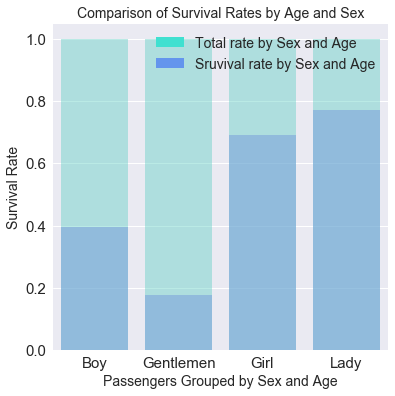

In [17]:
plt.figure(figsize=(6, 6))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

top_plot = sns.barplot(x = ['Boy', 'Gentlemen', 'Girl', 'Lady'], y = young_adult_df.iloc[0], color = "turquoise", alpha = 0.4)
top_plot = sns.barplot(x = ['Boy', 'Gentlemen', 'Girl', 'Lady'], y = young_adult_df.iloc[1], color = "cornflowerblue", alpha = 0.5)

plt.ylabel('Survival Rate', size = '14')
plt.xlabel('Passengers Grouped by Sex and Age', size = '14')
plt.title('Comparison of Survival Rates by Age and Sex', size = '14')

topbar = plt.Rectangle((0,0),1,1,fc="turquoise", alpha = 1)
bottombar = plt.Rectangle((0,0),1,1,fc="cornflowerblue", alpha = 1)
legend = plt.legend([topbar, bottombar], ['Total rate by Sex and Age', 'Sruvival rate by Sex and Age'], loc=0, ncol = 1, prop={'size':14})

When I compared previously the survival rate of passengers grouped by sex or age, young or female had higher priority to embark save boat than older or male respectively. However, that rule is not the same in the group categorized by their sex and age. Boys have a higher survival rate than adult males, it is larger than twice as many as the gentlemen. On the other hand, though the survival rate for both girls and ladies are entirely higher than male, the survival rate of ladies is little higher than girls, 0.78 and 0.69 respectively.

# Conclusion

It is half true that younger or women survived more than men or older in the actual Titanic disaster, as more young people saved their life than adults only in male group, but not in the female group. More adults survived than young people in the female group.

When I analysed this dataset, I found some suspicious data which have multiple cabins but with only one ticket. If that data might imply that passengers have the same name and that their missing ticket data were just concatenated into one, the data should be wrangled appropriately. However, this analysis only deals with passenger IDs and their age and sex (not dealing with cabin information), that suspicious data were not ruled out and those suspicious passengers were just dealt with as a one person. Beside, there is survivor bias in the data set, as the data were collected after the titanic disaster. So, variables (or factors) in the dataset are only depends on survivals at that time. Other possible variables which were for dead people might exist, but we do not know about that exactly.

For the future research, I want to look into the detail that 'the cabin class had an influence on the survival rate and the young and female groups'. Also I want to implement hypothesis test (t-test) to compare factors (columns in the dataset) as a further prediction in order to identify which one has the most possibilities to survive in a sinking cruise, dealing with titanic data set as a sample data. 

<!--
Looking briefly the first few rows of the data set, I found that almost passengers have no their cabin data, but some of them occupy multiple cabins though they have one ticket. It is possible that people having the same names in different rooms were recorded and could not be distinguishable who is the person rescued. So they will be rulled out, regardless that they were survived or not.

Because the element of multiple cabin are splited by space in plain text, firstly I checked the elements of cabin column have string data type. Then if those are string type, space in a row of Cabin column will be counted to find whether it has multiple values in it.
--> 
<!---
if the element in a row of Cabin column are NaN, it will be converted None type object to deal with no value data conveniently for later. Then, , and if the count is larger than 0, the row for that data will be deleted.
-->

<!--
def check_num_of_cabin(data):
    return len(data.split(' ')) if type(data) == str else 0

titanic_df['Multiple Cabin'] = titanic_df['Cabin'].apply(check_num_of_cabin)
titanic_df = titanic_df[titanic_df['Multiple Cabin'] <= 1]
titanic_df.drop('Multiple Cabin', axis=1, inplace=True)
titanic_df.head()
-->